# EM estimate vs direct optimization issue

Here I compare EM with `optim` in a larger simulated data-set involving 50 conditions. Example below is when `EM` and `optim` results are different and `optim` result is better.

In [ ]:
dat = readRDS('mnm_shared/lite_data_1_artificial_mixture_1_mnm_shared_1.rds')

Script to load simulated data and generate the result is available via `cat(dat$DSC_DEBUG$script)`. Simply copy that code and run the data generation; then run the analysis using `EM` and `optim`.

## EM result

In [7]:
result = msusie(X, Y, L=L, prior_variance=matrix(1,50,50), residual_variance=resid_Y, compute_objective=T, estimate_residual_variance=F, estimate_prior_variance=T, 
                estimate_prior_method='EM', track_fit=T, precompute_covariances=F)

Loading mmbr



In [8]:
result$V

[1] 0.1331904 0.1331217 0.1327979 0.1326599 0.1326338 0.0000000 0.0000000
 [8] 0.0000000 0.0000000 0.0000000

It seems the prior estimate are consistantly large for all effects. This data-set has 3 simulated signals,

In [19]:
which(rowSums(meta$true_coef) != 0)

[1]  43 129 162

But we have captured 4 effects with non-zero PIP, 2 of them are real.

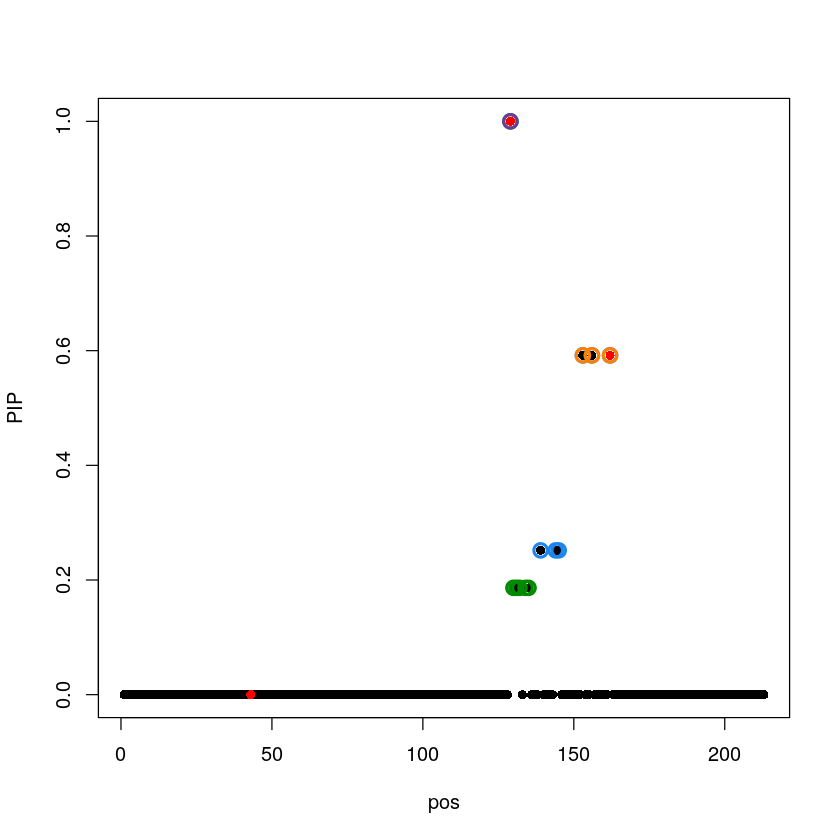

In [18]:
susieR::susie_plot(result, y='PIP',b=rowSums(meta$true_coef))

## `optim` result

It takes long time to compute, but the PIP is cleaner. The estimated prior scalar is also smaller.

In [9]:
result2 = msusie(X, Y, L=L, prior_variance=matrix(1,50,50), residual_variance=resid_Y, compute_objective=T, estimate_residual_variance=F, estimate_prior_variance=T, 
                estimate_prior_method='optim', track_fit=T, precompute_covariances=F)

In [10]:
result2$V

[1] 0.0007557952 0.0009296375 0.0002614547 0.0000000000 0.0000000000
 [6] 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000

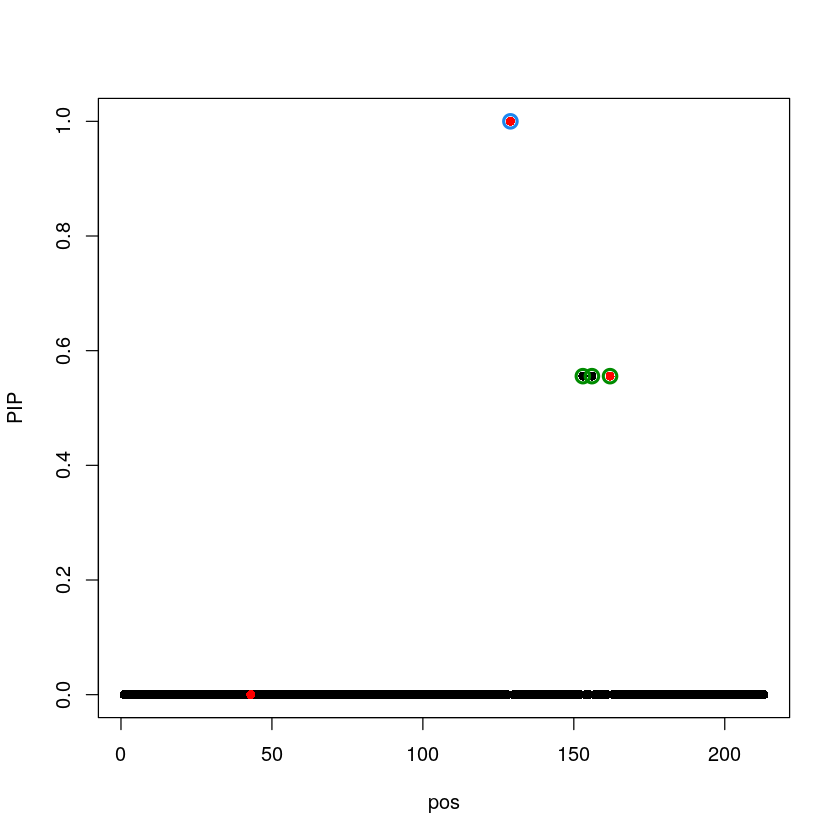

In [17]:
susieR::susie_plot(result2, y='PIP', b=rowSums(meta$true_coef))